In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
import seaborn as sns
import librosa
import librosa.display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
from pydub import AudioSegment
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

## Data Part

In [2]:
df = pd.read_csv("/kaggle/input/tafahas/audio_features(9).csv")

In [3]:
df.head()

,File Path,File Name (WAV),Mean MFCC Coefficients,Spectral Centroid,Sample Rate,Duration (seconds),Class Label
0,/kaggle/working/output_dataset/Generated Voice...,2.6.9.0.0.wav,"[-463.0484619140625, 107.15552520751953, 25.76...",1253.355869,441000,18.0,Generated Voices by ai voices
1,/kaggle/working/output_dataset/Generated Voice...,2.6.7.0.0.wav,"[-443.50152587890625, 97.10150909423828, 31.84...",922.834842,441000,18.0,Generated Voices by ai voices
2,/kaggle/working/output_dataset/Generated Voice...,2.5.8.0.0.wav,"[-454.6553649902344, 79.39002227783203, 26.142...",961.790485,441000,18.0,Generated Voices by ai voices
3,/kaggle/working/output_dataset/Generated Voice...,2.4.6.0.0.wav,"[-473.5799865722656, 81.26899719238281, 27.133...",1005.355416,441000,18.0,Generated Voices by ai voices
4,/kaggle/working/output_dataset/Generated Voice...,2.6.0.0.0.wav,"[-483.6876220703125, 95.53182983398438, 29.728...",1001.768648,441000,18.0,Generated Voices by ai voices


In [4]:
data_features = df.iloc[:, 2:6]

In [5]:
data_features.head() # only the needed 

,Mean MFCC Coefficients,Spectral Centroid,Sample Rate,Duration (seconds)
0,"[-463.0484619140625, 107.15552520751953, 25.76...",1253.355869,441000,18.0
1,"[-443.50152587890625, 97.10150909423828, 31.84...",922.834842,441000,18.0
2,"[-454.6553649902344, 79.39002227783203, 26.142...",961.790485,441000,18.0
3,"[-473.5799865722656, 81.26899719238281, 27.133...",1005.355416,441000,18.0
4,"[-483.6876220703125, 95.53182983398438, 29.728...",1001.768648,441000,18.0


In [6]:
data_features['Mean MFCC Coefficients'] 

0      [-463.0484619140625, 107.15552520751953, 25.76...
1      [-443.50152587890625, 97.10150909423828, 31.84...
2      [-454.6553649902344, 79.39002227783203, 26.142...
3      [-473.5799865722656, 81.26899719238281, 27.133...
4      [-483.6876220703125, 95.53182983398438, 29.728...
                             ...                        
133    [-427.9771728515625, 97.63719177246094, 28.873...
134    [-436.3186950683594, 85.73974609375, 28.996187...
135    [-428.73193359375, 92.20032501220703, 28.93862...
136    [-429.6935729980469, 89.70471954345703, 28.540...
137    [-387.77105712890625, 119.86361694335938, 29.6...
Name: Mean MFCC Coefficients, Length: 138, dtype: object

In [7]:
df['Class Label'].unique() # labels >> classes 

array(['Generated Voices by ai voices', 'Real Voices', 'Cloned Voices'],
      dtype=object)

In [8]:
# Convert labels to number 
label_encoder = LabelEncoder()
df['Class Label encoded'] = label_encoder.fit_transform(df['Class Label'])

In [9]:
df['Class Label'].unique()

array(['Generated Voices by ai voices', 'Real Voices', 'Cloned Voices'],
      dtype=object)

In [10]:
df['Class Label encoded'].unique() #  cloned=0, real=2, gen by ai=1

array([1, 2, 0])

## mfcc separating 

The "Mean MFCC Coefficients" is a list of string so we need to convert it to an actual list of floats using the apply(eval) method which will evaluates the string as a Python expression >> in our case will convert the string number to a float number 

In [11]:
# Convert the "Mean MFCC Coefficients" column from string to floats
data_features['Mean MFCC Coefficients'] = data_features['Mean MFCC Coefficients'].apply(eval)

In [12]:
data_features['Mean MFCC Coefficients']

0      [-463.0484619140625, 107.15552520751953, 25.76...
1      [-443.50152587890625, 97.10150909423828, 31.84...
2      [-454.6553649902344, 79.39002227783203, 26.142...
3      [-473.5799865722656, 81.26899719238281, 27.133...
4      [-483.6876220703125, 95.53182983398438, 29.728...
                             ...                        
133    [-427.9771728515625, 97.63719177246094, 28.873...
134    [-436.3186950683594, 85.73974609375, 28.996187...
135    [-428.73193359375, 92.20032501220703, 28.93862...
136    [-429.6935729980469, 89.70471954345703, 28.540...
137    [-387.77105712890625, 119.86361694335938, 29.6...
Name: Mean MFCC Coefficients, Length: 138, dtype: object

stacked the "Mean MFCC Coefficients" column into lists, and create new columns for each element in the lists which means every element in the mfcc list will be in a seperate column making 20 mfcc features each row is a sample that have the mfcc's in that row. 

to do that we converted the stacked lists into a Data Frame.then we joined the mfcc Data Frame with the our Data Frame: data_features. then we droped the Mean MFCC Coefficients from our data frame due to the fact that we don't need it any more 

In [13]:
data_features['Mean MFCC Coefficients'].tolist()

[[-463.0484619140625,
  107.15552520751953,
  25.766592025756836,
  -37.599910736083984,
  -44.050315856933594,
  -7.894617557525635,
  25.028833389282227,
  24.239154815673828,
  -1.0875608921051025,
  -20.07011604309082,
  -15.57258129119873,
  1.2497954368591309,
  8.345414161682129,
  -1.579929232597351,
  -15.623174667358398,
  -17.928823471069336,
  -7.391050338745117,
  3.4279561042785645,
  3.9698283672332764,
  -3.543818950653076],
 [-443.50152587890625,
  97.10150909423828,
  31.845523834228516,
  -21.510379791259766,
  -31.925878524780273,
  -8.258444786071777,
  15.786948204040527,
  16.378379821777344,
  -1.2967232465744019,
  -15.079524993896484,
  -11.941571235656738,
  0.3503307104110718,
  5.396183013916016,
  -2.528261184692383,
  -13.673670768737793,
  -15.57100772857666,
  -7.055788993835449,
  1.8812291622161865,
  2.3396687507629395,
  -4.195483684539795],
 [-454.6553649902344,
  79.39002227783203,
  26.14277458190918,
  -16.34453582763672,
  -22.694374084472656,


In [14]:
# create new columns for Mean MFCC Coefficients
data_features = data_features.join(pd.DataFrame(data_features['Mean MFCC Coefficients'].tolist(), columns=[f'MFCC_{i}' for i in range(20)]))

In [15]:
# Drop the original "Mean MFCC Coefficients" column,Sample Rate, Duration for feature selection 
data_features.drop('Mean MFCC Coefficients', axis=1, inplace=True)
data_features.drop('Sample Rate', axis=1, inplace=True)
data_features.drop('Duration (seconds)', axis=1, inplace=True)

In [16]:
data_features.head() # we will use Spectral contrast & mfcc 

,Spectral Centroid,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,1253.355869,-463.048462,107.155525,25.766592,-37.599911,-44.050316,-7.894618,25.028833,24.239155,-1.087561,...,-15.572581,1.249795,8.345414,-1.579929,-15.623175,-17.928823,-7.391050,3.427956,3.969828,-3.543819
1,922.834842,-443.501526,97.101509,31.845524,-21.510380,-31.925879,-8.258445,15.786948,16.378380,-1.296723,...,-11.941571,0.350331,5.396183,-2.528261,-13.673671,-15.571008,-7.055789,1.881229,2.339669,-4.195484
2,961.790485,-454.655365,79.390022,26.142775,-16.344536,-22.694374,-1.335382,18.684362,17.405396,0.084801,...,-11.513140,-0.620874,4.733402,-1.137631,-10.575718,-13.018121,-6.886503,0.098712,0.699097,-4.218849
3,1005.355416,-473.579987,81.268997,27.133022,-16.327650,-23.541739,-3.003403,16.318396,14.901630,-1.606429,...,-10.502681,0.522660,5.078091,-1.536211,-10.858258,-12.544206,-5.975734,0.531934,0.210381,-5.035092
4,1001.768648,-483.687622,95.531830,29.728680,-23.030621,-31.404675,-5.470304,19.396692,18.790894,-1.120663,...,-13.762914,-0.556363,5.837559,-1.005819,-11.779822,-14.237789,-7.066321,0.448753,0.369540,-5.390703


In [17]:
# Split the data into features and labels 
X = data_features 
y = df['Class Label']

In [18]:
X.head()

,Spectral Centroid,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,1253.355869,-463.048462,107.155525,25.766592,-37.599911,-44.050316,-7.894618,25.028833,24.239155,-1.087561,...,-15.572581,1.249795,8.345414,-1.579929,-15.623175,-17.928823,-7.391050,3.427956,3.969828,-3.543819
1,922.834842,-443.501526,97.101509,31.845524,-21.510380,-31.925879,-8.258445,15.786948,16.378380,-1.296723,...,-11.941571,0.350331,5.396183,-2.528261,-13.673671,-15.571008,-7.055789,1.881229,2.339669,-4.195484
2,961.790485,-454.655365,79.390022,26.142775,-16.344536,-22.694374,-1.335382,18.684362,17.405396,0.084801,...,-11.513140,-0.620874,4.733402,-1.137631,-10.575718,-13.018121,-6.886503,0.098712,0.699097,-4.218849
3,1005.355416,-473.579987,81.268997,27.133022,-16.327650,-23.541739,-3.003403,16.318396,14.901630,-1.606429,...,-10.502681,0.522660,5.078091,-1.536211,-10.858258,-12.544206,-5.975734,0.531934,0.210381,-5.035092
4,1001.768648,-483.687622,95.531830,29.728680,-23.030621,-31.404675,-5.470304,19.396692,18.790894,-1.120663,...,-13.762914,-0.556363,5.837559,-1.005819,-11.779822,-14.237789,-7.066321,0.448753,0.369540,-5.390703


In [19]:
y.head()

0    Generated Voices by ai voices
1    Generated Voices by ai voices
2    Generated Voices by ai voices
3    Generated Voices by ai voices
4    Generated Voices by ai voices
Name: Class Label, dtype: object

In [20]:
y=df['Class Label encoded']

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class Label encoded, dtype: int64

### Data splitting 

In [22]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3,random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.33,random_state=10)  

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 96
Validation set size: 14
Test set size: 28


In [23]:
# scale 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [24]:
X_train 

array([[ 4.61542101e-01, -1.57218469e+00, -1.43940006e-02, ...,
         5.87216434e-01,  5.57764251e-01, -2.71167351e-01],
       [ 1.11715082e+00,  7.30693675e-01, -2.32324904e-01, ...,
        -6.73446865e-01,  6.73402048e-01,  2.10365962e+00],
       [-5.19337096e-01,  9.40943845e-01,  2.86272005e-01, ...,
         4.94723999e-01,  9.22664264e-01,  4.58521387e-01],
       ...,
       [-3.32873806e-01, -9.12570134e-04, -6.32962550e-01, ...,
        -1.07684875e-01, -3.29990126e-01, -2.11817378e-01],
       [-4.86787264e-01,  1.01326148e+00, -4.80263563e-01, ...,
         2.46374317e-01,  4.27307758e-01,  2.94908258e-01],
       [ 1.40382703e-01, -5.47019311e-01, -2.03850028e-01, ...,
         4.77117474e-01,  3.04952913e-01, -2.27744325e-01]])

In [25]:
X_test

array([[-7.37975846e-01,  9.12246837e-01, -4.37857338e-01,
         9.19987944e-02,  5.69940218e-01,  6.57565375e-01,
         9.49466345e-01,  1.00934353e-01, -1.69867260e-01,
        -8.71003445e-02,  1.26731471e-02, -3.63980090e-01,
        -8.76707185e-01, -8.04511915e-01, -5.85097517e-01,
         2.46457500e-01,  5.91746628e-01,  7.78460676e-01,
         3.58748638e-01,  3.35673540e-01,  4.46323404e-02],
       [ 2.13333335e-01, -1.41048181e+00, -5.60016667e-01,
        -9.16753031e-01,  1.78323723e-01,  4.14140761e-01,
         7.95743996e-01,  2.18938008e-02, -5.58270415e-01,
        -1.08533624e+00, -1.15479567e-01,  7.76021509e-01,
         1.23329837e+00,  8.79978601e-01,  7.79083305e-01,
         2.64729974e-01,  4.99841142e-01,  1.10900564e+00,
         5.68825356e-01, -4.10061850e-02, -8.26056544e-01],
       [-6.95925119e-01,  4.48410678e-01, -1.24689825e+00,
        -5.77587187e-01,  1.05510898e+00,  1.20674331e+00,
         1.31965930e+00, -3.12667242e-01, -4.43978455e

## Logistic Regression

C: Inverse of regularization strength, smaller values specify stronger regularization
default 1



solver:use in the optimization problem

In [26]:
# LR model
model = LogisticRegression(penalty='l1', C=0.7, solver='liblinear',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.7, max_iter=1000, penalty='l1', solver='liblinear')

# Cross validation 

In [27]:
# cross-validation
LR_cv_scores = cross_val_score(model, X, y, cv=10)

#cross-validation scores
print("Cross-validation scores:", LR_cv_scores)
print("Mean CV accuracy:", np.mean(LR_cv_scores))

Cross-validation scores: [0.78571429 0.78571429 0.85714286 0.71428571 0.78571429 0.85714286
 1.         0.85714286 1.         0.84615385]
Mean CV accuracy: 0.8489010989010989


# Evaluate the model on the test set, validation set

In [28]:
train_score = model.score(X_train, y_train)
print(f"training accuracy: {train_score:.2f}")
val_score = model.score(X_val, y_val)
print(f"Validation accuracy: {val_score:.2f}")
test_score = model.score(X_test, y_test)
print(f"Test accuracy: {test_score:.2f}")


training accuracy: 0.84
Validation accuracy: 0.79
Test accuracy: 0.89


In [29]:
LR_preds = model.predict(X_test)
LR_preds

array([0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 2, 2, 1, 0])

### Evaluate Logistic Regression model

In [30]:
accuracy_lr = accuracy_score(y_test, LR_preds)
print(f"Accuracy: {accuracy_lr}")
precision_lr = precision_score(y_test, LR_preds,average='weighted')
print(f"Precision: {precision_lr}")
recall_lr = recall_score(y_test, LR_preds, average='weighted')
print(f"Recall: {recall_lr}") 

Accuracy: 0.8928571428571429
Precision: 0.8955357142857142
Recall: 0.8928571428571429


### Confusion_Matrix

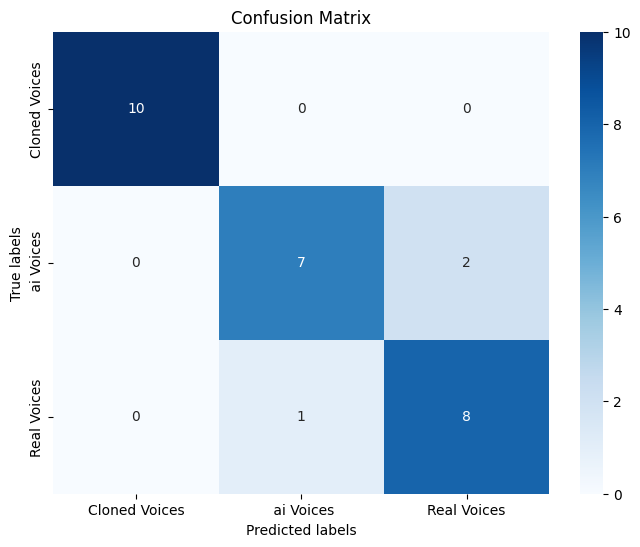

In [31]:
class_names =  ['Cloned Voices' , ' ai Voices', 'Real Voices']

cm = confusion_matrix(y_test, LR_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##  classification report

In [32]:
report = classification_report(y_test, LR_preds)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.80      0.89      0.84         9

    accuracy                           0.89        28
   macro avg       0.89      0.89      0.89        28
weighted avg       0.90      0.89      0.89        28



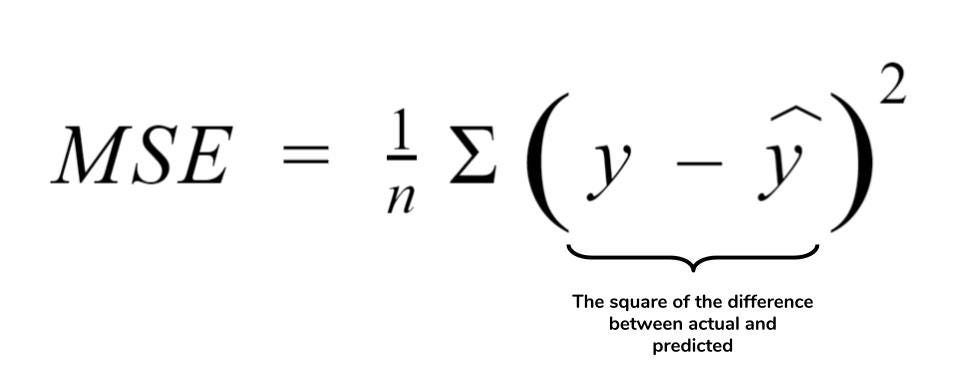

### Training/ Validation Loss

In [33]:
train_loss = mean_squared_error(y_train, model.predict(X_train))
val_loss = mean_squared_error(y_val, model.predict(X_val))

In [34]:
print("Training loss:",train_loss )
print("Validation loss:",val_loss )

Training loss: 0.25
Validation loss: 0.21428571428571427


## K Nearest Neighbors

### Elbow for different values of k

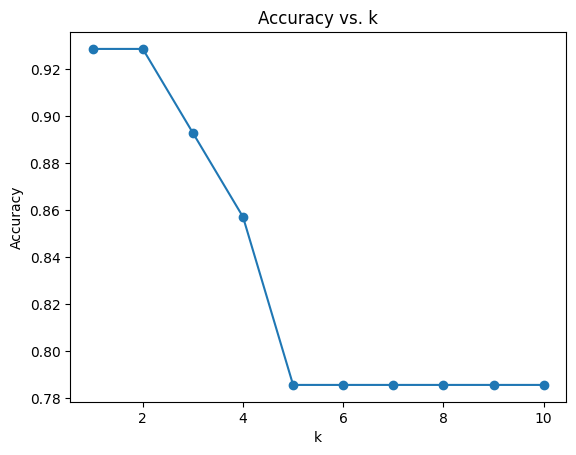

In [35]:
k_values = range(1, 11)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()

* n_neighbors == classify the point according to its 5 neighbors
* weights== uniform all points have the same weight aka importance 
* algorithm== auto will choose the best algorithm that suits the data 
* metric== cityblock manhatten distance 

In [36]:
# KNN model
knn=KNeighborsClassifier(n_neighbors=5, weights='uniform',algorithm='auto',metric='cityblock')

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='cityblock')

### cross-validation

In [37]:
# cross-validation
knn_cv_scores = cross_val_score(knn, X, y, cv=10)

# cross-validation scores
print("Cross-Validation Scores:", knn_cv_scores)
print("Average Accuracy:", knn_cv_scores.mean())

Cross-Validation Scores: [0.78571429 0.92857143 0.78571429 0.85714286 0.78571429 0.78571429
 0.92857143 0.92857143 0.76923077 0.76923077]
Average Accuracy: 0.8324175824175825


In [38]:
train_score = knn.score(X_train, y_train)
print(f"training accuracy: {train_score:.2f}")
val_score = knn.score(X_val, y_val)
print(f"Validation accuracy: {val_score:.2f}")
test_score = knn.score(X_test, y_test)
print(f"Test accuracy: {test_score:.2f}")


training accuracy: 0.80
Validation accuracy: 0.71
Test accuracy: 0.79


In [39]:
KNN_preds = knn.predict(X_test)
KNN_preds

array([0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0,
       2, 0, 2, 2, 1, 0])

### Evaluate KNN model

In [40]:
accuracy_knn = accuracy_score(y_test, KNN_preds)
print(f"Accuracy: {accuracy_knn}")
precision_knn = precision_score(y_test, KNN_preds,average='weighted')
print(f"Precision: {precision_knn}")
recall_knn = recall_score(y_test, KNN_preds, average='weighted')
print(f"Recall: {recall_knn}") 

Accuracy: 0.7857142857142857
Precision: 0.7782931354359927
Recall: 0.7857142857142857


### Confusion_matrix & Classification report 

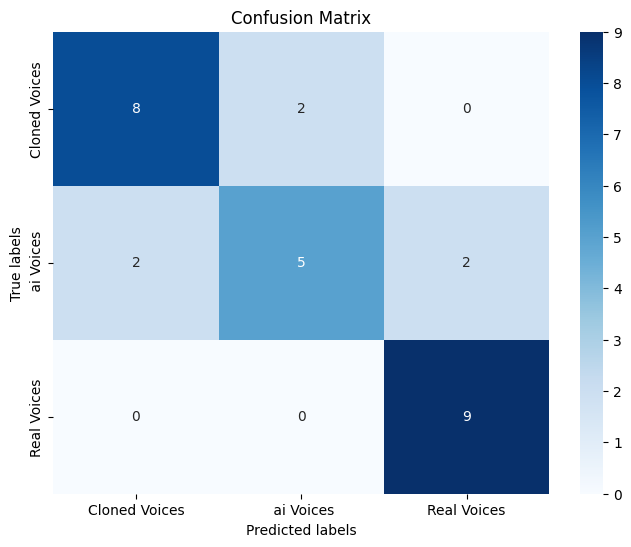

In [41]:
class_names =  ['Cloned Voices' , ' ai Voices', 'Real Voices']
cm = confusion_matrix(y_test, KNN_preds)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
report = classification_report(y_test, KNN_preds)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.71      0.56      0.63         9
           2       0.82      1.00      0.90         9

    accuracy                           0.79        28
   macro avg       0.78      0.79      0.78        28
weighted avg       0.78      0.79      0.78        28



### Training/ Validation Loss

In [43]:
train_loss = mean_squared_error(y_train, knn.predict(X_train))
val_loss = mean_squared_error(y_val, knn.predict(X_val))
print("Training loss:",train_loss )
print("Validation loss:",val_loss )

Training loss: 0.3229166666666667
Validation loss: 0.2857142857142857


### Cross-Validation

## Support Vector machine SVM


* A smaller value of C 
 leads to a softer margin, allowing some misclassifications in the training set if it helps to achieve a simpler decision boundary that generalizes better to unseen data. This can help prevent overfitting.

* A larger value of C
 makes the SVM prioritize classifying all training examples correctly, potentially leading to a more complex decision boundary that may overfit the training data.

The linear kernel is the simplest kernel function, where the similarity between two data points is measured by their dot product.
This kernel is computationally less expensive compared to other kernel functions and can work well for many classification problems, especially when the number of features is large compared to the number of samples.

In [44]:
from sklearn.model_selection import train_test_split

# SVM model
svm = SVC(  C=0.7,kernel='linear',probability=True)
svm.fit(X_train, y_train)

SVC(C=0.7, kernel='linear', probability=True)

### Cross-Validation

In [45]:
# cross-validation
SVM_cv_scores = cross_val_score(svm, X, y, cv=10)

print("Cross-validation scores:", SVM_cv_scores)
print("Mean CV accuracy:", np.mean(SVM_cv_scores))

Cross-validation scores: [0.85714286 0.92857143 0.78571429 0.92857143 0.78571429 0.78571429
 1.         0.85714286 1.         0.92307692]
Mean CV accuracy: 0.8851648351648352


In [46]:
train_score = svm.score(X_train, y_train)
print(f"training accuracy: {train_score:.2f}")
val_score = svm.score(X_val, y_val)
print(f"Validation accuracy: {val_score:.2f}")
test_score = svm.score(X_test, y_test)
print(f"Test accuracy: {test_score:.2f}")


training accuracy: 0.92
Validation accuracy: 0.93
Test accuracy: 0.93


In [47]:
SVM_preds = svm.predict(X_test)
SVM_preds

array([0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 2, 2, 1, 0])

#### Evaluate SVM model

In [48]:
accuracy_svm = accuracy_score(y_test, SVM_preds)
print(f"Accuracy: {accuracy_svm}")
precision_svm = precision_score(y_test, SVM_preds,average='weighted')
print(f"Precision: {precision_svm}")
recall_svm = recall_score(y_test, SVM_preds, average='weighted')
print(f"Recall: {recall_svm}") 

Accuracy: 0.9285714285714286
Precision: 0.9318181818181818
Recall: 0.9285714285714286


### Confusion matrix

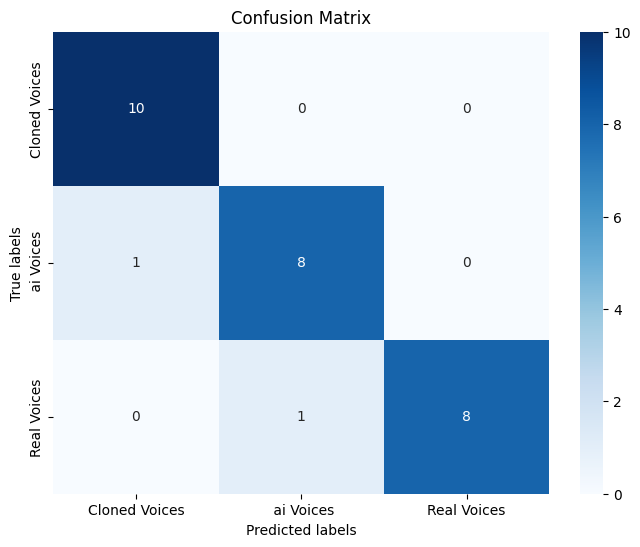

In [49]:
cm = confusion_matrix(y_test, SVM_preds)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
report = classification_report(y_test, SVM_preds)


print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.89      0.89      0.89         9
           2       1.00      0.89      0.94         9

    accuracy                           0.93        28
   macro avg       0.93      0.93      0.93        28
weighted avg       0.93      0.93      0.93        28



### Training/ Validation Loss

In [51]:
train_loss = mean_squared_error(y_train, svm.predict(X_train))
val_loss = mean_squared_error(y_val, svm.predict(X_val))
print("Training loss:",train_loss )
print("Validation loss:",val_loss )

Training loss: 0.11458333333333333
Validation loss: 0.07142857142857142


## END 


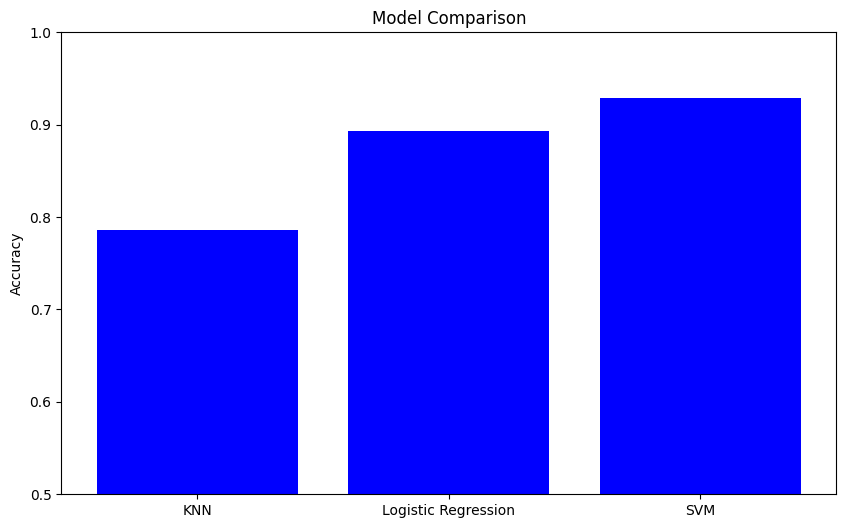

In [52]:
# Plot the accuracies
models = ['KNN', 'Logistic Regression', 'SVM']
accuracies = [accuracy_knn, accuracy_lr, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='Blue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.5, 1.0)  
plt.show()